In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [2]:
#Reading the 2024 October data we have
future_df = pd.read_csv('ekim_verileri.csv')

In [3]:
future_df

,time,temperature(°C),humidity(%),cloudcover(%),windspeed(km/h),irrediance(W/m²)
0,2024-10-01 00:00:00,18.1,94,100,9.7,0.0
1,2024-10-01 01:00:00,18.4,93,100,10.6,0.0
2,2024-10-01 02:00:00,18.4,92,66,11.3,0.0
3,2024-10-01 03:00:00,18.3,94,100,13.8,0.0
4,2024-10-01 04:00:00,18.4,94,51,14.8,0.0
...,...,...,...,...,...,...
716,2024-10-30 20:00:00,18.8,89,4,17.3,0.0
717,2024-10-30 21:00:00,18.4,91,7,15.3,0.0
718,2024-10-30 22:00:00,18.1,93,8,11.5,0.0
719,2024-10-30 23:00:00,17.8,94,5,9.8,0.0


In [4]:
#Convert the time column to the appropriate format
future_df['time'] = pd.to_datetime(future_df['time'])

In [5]:
#Obtaining new properties from time column
future_df['hour'] = future_df['time'].dt.hour
future_df['day'] = future_df['time'].dt.day
future_df['month'] = future_df['time'].dt.month
future_df['year'] = future_df['time'].dt.year


In [6]:
#edit columns
future_df = future_df[['hour', 'day', 'month', 'year', 'temperature(°C)', 'humidity(%)', 'cloudcover(%)', 'windspeed(km/h)', 'irrediance(W/m²)']]

In [7]:
future_df

,hour,day,month,year,temperature(°C),humidity(%),cloudcover(%),windspeed(km/h),irrediance(W/m²)
0,0,1,10,2024,18.1,94,100,9.7,0.0
1,1,1,10,2024,18.4,93,100,10.6,0.0
2,2,1,10,2024,18.4,92,66,11.3,0.0
3,3,1,10,2024,18.3,94,100,13.8,0.0
4,4,1,10,2024,18.4,94,51,14.8,0.0
...,...,...,...,...,...,...,...,...,...
716,20,30,10,2024,18.8,89,4,17.3,0.0
717,21,30,10,2024,18.4,91,7,15.3,0.0
718,22,30,10,2024,18.1,93,8,11.5,0.0
719,23,30,10,2024,17.8,94,5,9.8,0.0


In [16]:
features = ['hour', 'day', 'month',	'year', 'temperature(°C)', 'humidity(%)', 'cloudcover(%)', 'windspeed(km/h)', 'irrediance(W/m²)']

In [17]:
#Uploading the model that worked best in the previous code
best_model = joblib.load('GradientBoostingRegressor_Model.joblib')

#Only october data
october_data = future_df[future_df['month'] == 10]



In [18]:
# Estimate energy consumption
october_data['Predicted_Consumption_kWh'] = best_model.predict(october_data[features])

In [19]:
october_data.head(30)

,hour,day,month,year,temperature(°C),humidity(%),cloudcover(%),windspeed(km/h),irrediance(W/m²),Predicted_Consumption_kWh
0,0,1,10,2024,18.1,94,100,9.7,0.0,5.859020
1,1,1,10,2024,18.4,93,100,10.6,0.0,5.859020
2,2,1,10,2024,18.4,92,66,11.3,0.0,5.862522
3,3,1,10,2024,18.3,94,100,13.8,0.0,5.867505
4,4,1,10,2024,18.4,94,51,14.8,0.0,5.871006
5,5,1,10,2024,18.5,93,74,15.7,0.0,5.871006
6,6,1,10,2024,18.5,92,84,11.1,0.0,5.862522
7,7,1,10,2024,18.2,93,100,14.2,0.0,5.867505
8,8,1,10,2024,17.8,94,100,12.3,4.3,5.857713
9,9,1,10,2024,18.3,92,89,16.3,0.0,5.871006


In [20]:
#converting to datetime format
october_data['datetime'] = pd.to_datetime(october_data[['year', 'month', 'day', 'hour']])

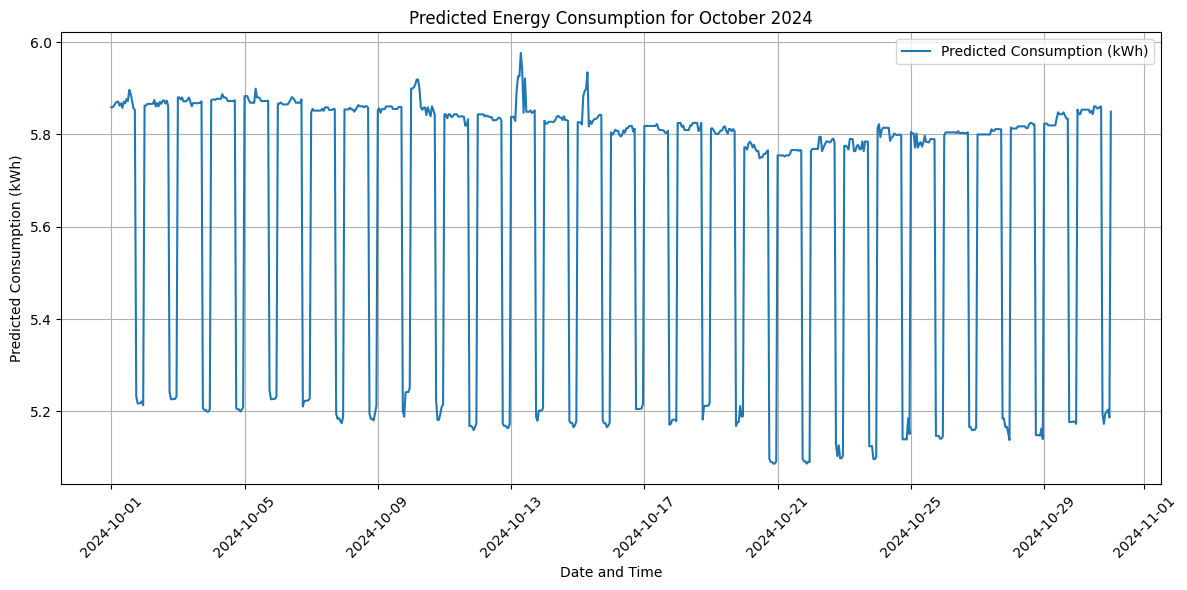

In [21]:
#energy produced over time graph
plt.figure(figsize=(12, 6))
plt.plot(october_data['datetime'], october_data['Predicted_Consumption_kWh'], label='Predicted Consumption (kWh)')
plt.xlabel('Date and Time')
plt.ylabel('Predicted Consumption (kWh)')
plt.title('Predicted Energy Consumption for October 2024')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


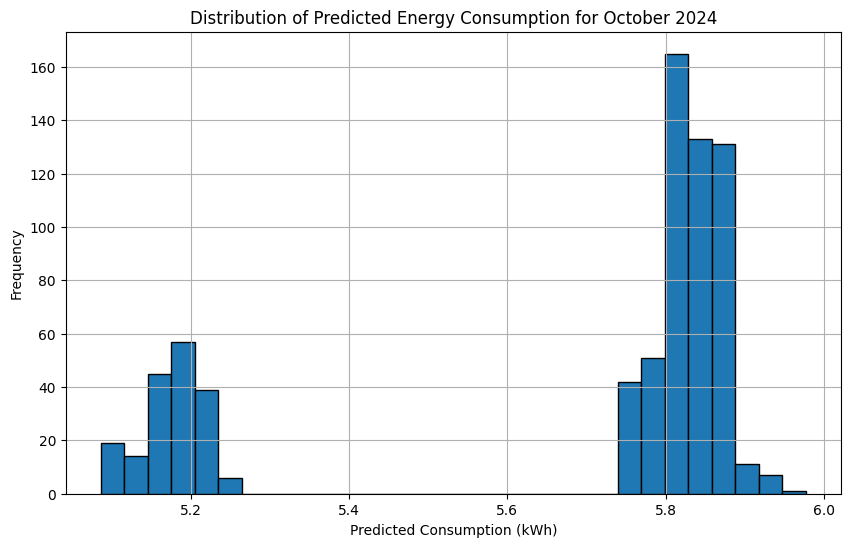

In [22]:
#Graph showing how much energy and how often
plt.figure(figsize=(10, 6))
plt.hist(october_data['Predicted_Consumption_kWh'], bins=30, edgecolor='black')
plt.xlabel('Predicted Consumption (kWh)')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Energy Consumption for October 2024')
plt.grid(True)
plt.show()

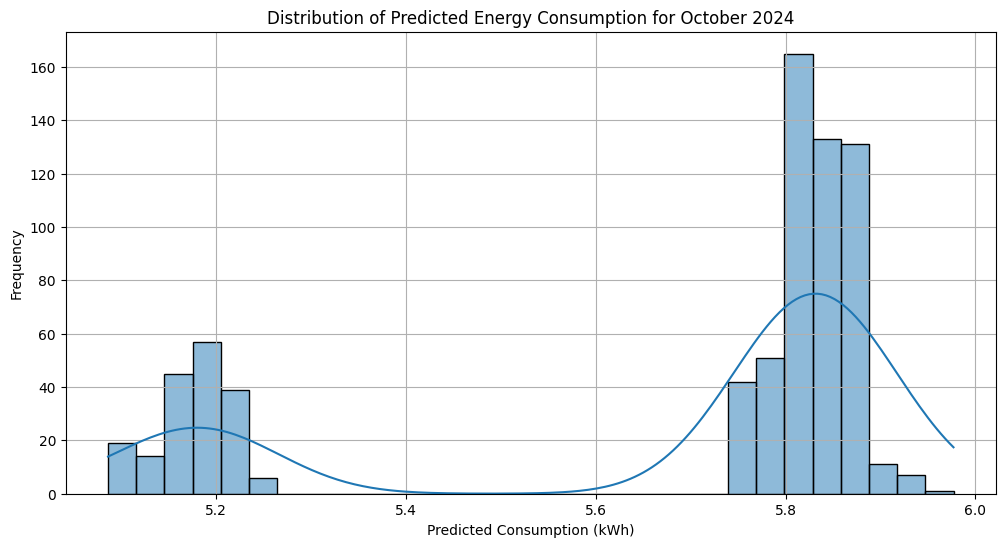

In [23]:
import seaborn as sns
#Chart showing what consumption is consumed at what frequency and the relationship between energy consumed
plt.figure(figsize=(12, 6))
sns.histplot(october_data['Predicted_Consumption_kWh'], kde=True, bins=30)
plt.xlabel('Predicted Consumption (kWh)')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Energy Consumption for October 2024')
plt.grid(True)
plt.show()

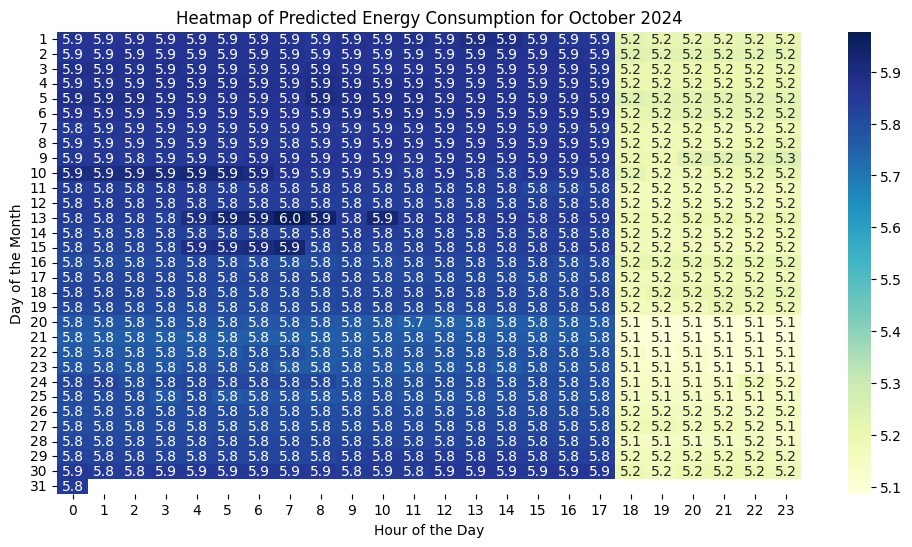

In [24]:
#Heatmap graph showing the relationship between consumed energy and time
pivot_table = october_data.pivot_table(values='Predicted_Consumption_kWh', index='day', columns='hour', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f")
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Month')
plt.title('Heatmap of Predicted Energy Consumption for October 2024')
plt.show()

In [25]:
#removing 'datetime' column
october_data_no_datetime = october_data.drop(columns=['datetime'])

#Saving data to CSV file
october_data_no_datetime.to_csv('ekim_2024_tahminleri.csv', index=False)
